In [15]:
!pip install pandas seaborn scikit-learn matplotlib

In [16]:
import pandas as pd

# 데이터셋 로드
file_path = 'breast_cancer.csv'  # 실제 파일 경로로 수정
data = pd.read_csv(file_path)

# 데이터셋 기본 정보 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# 데이터셋에서 불필요한 열 제거
data.drop(columns=['id'], inplace=True)
print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [18]:
# 결측값 확인
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# 결측값이 없는 경우, 아래의 메시지를 출력
if missing_values.sum() == 0:
    print("결측값이 없습니다.")

Series([], dtype: int64)
결측값이 없습니다.


In [19]:
# 'diagnosis' 열을 숫자로 변환 (M: 1, B: 0)
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})
print(data['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


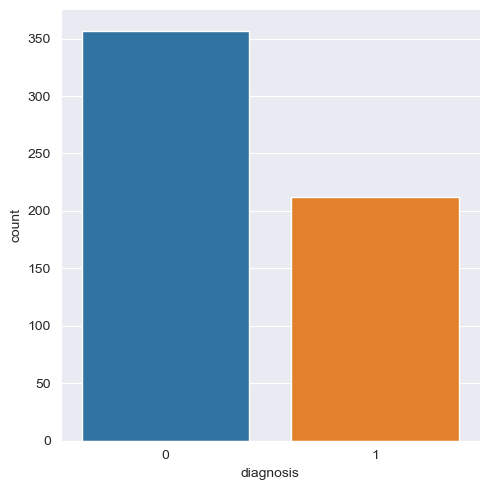

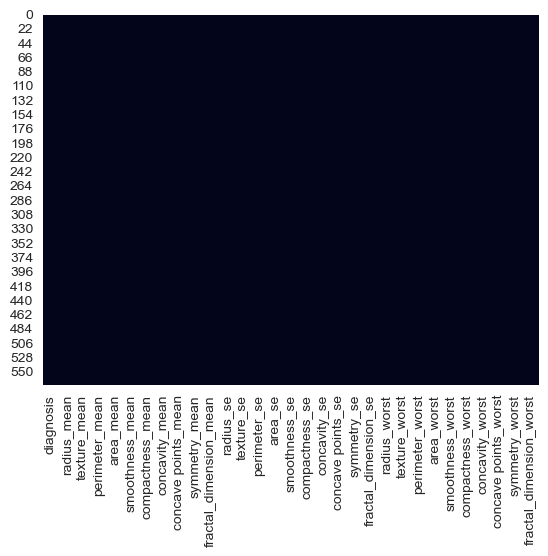

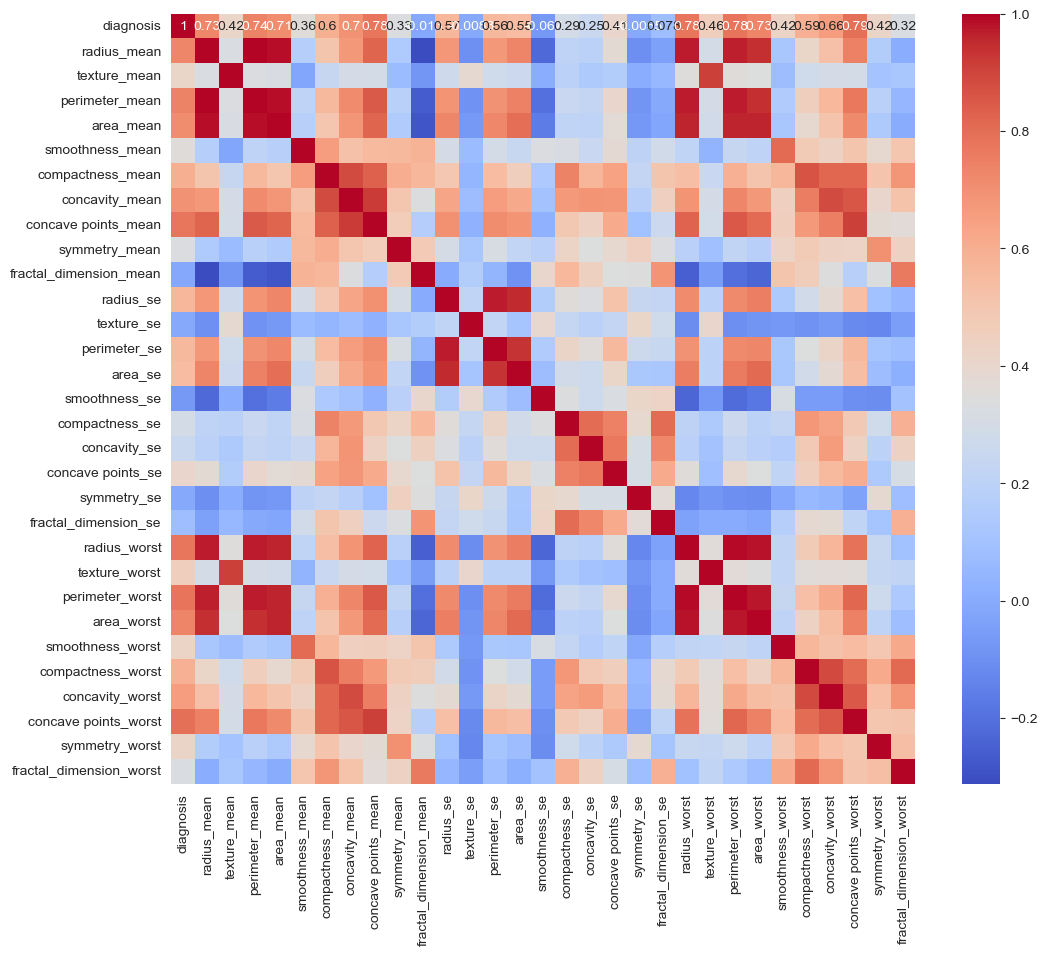

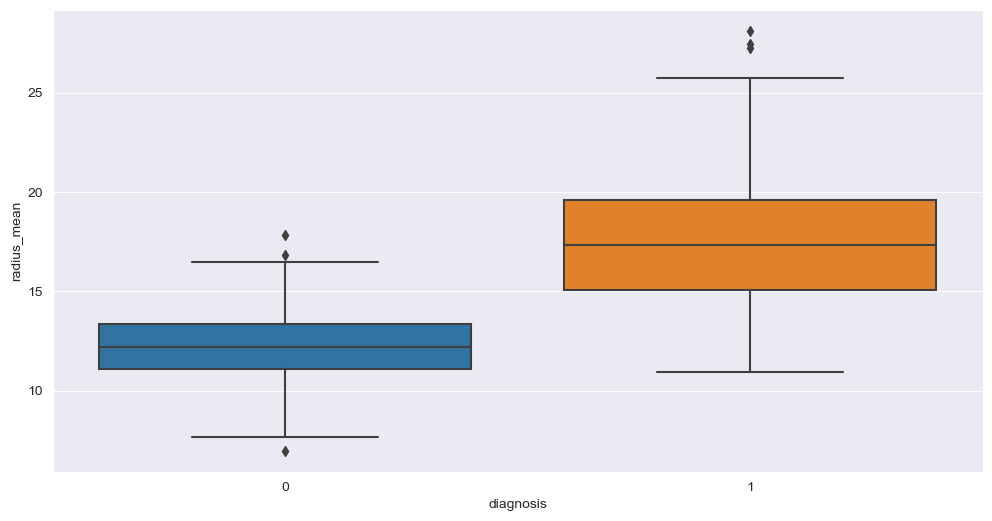

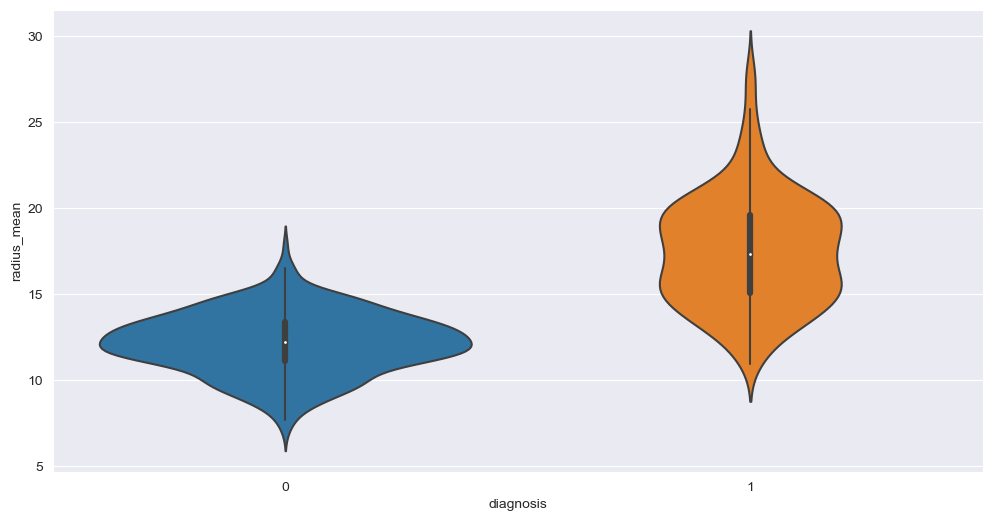

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# diagnosis별 특징 분포 시각화
sns.catplot(x='diagnosis', kind='count', data=data)
plt.show()

# 히트맵을 사용한 결측값 시각화 (결측값이 없을 경우 예시 코드)
sns.heatmap(data.isnull(), cbar=False)
plt.show()

# 상관 행렬 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Box Plot으로 특정 변수의 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

# Violin Plot으로 특정 변수의 분포 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

# 필요한 열만 선택하여 정규화
features = data.columns[1:]  # 'diagnosis' 열을 제외한 나머지 열 선택
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     0.521037      0.022658        0.545989   0.363733   
1          1     0.643144      0.272574        0.615783   0.501591   
2          1     0.601496      0.390260        0.595743   0.449417   
3          1     0.210090      0.360839        0.233501   0.102906   
4          1     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.686364  ...      0.620776       0.1

In [22]:
from sklearn.model_selection import train_test_split

# 특징(X)와 타겟(y) 설정
X = data[features]
y = data['diagnosis']

# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 기본 Decision Tree 모델 학습
clf_basic = DecisionTreeClassifier(random_state=333)
clf_basic.fit(X_train, y_train)

# 예측 및 평가
y_pred_basic = clf_basic.predict(X_test)
acc_basic = accuracy_score(y_test, y_pred_basic)
print(f'Basic Decision Tree Accuracy: {acc_basic * 100:.2f}%')

# 혼동 행렬 및 분류 보고서 출력
print(confusion_matrix(y_test, y_pred_basic))
print(classification_report(y_test, y_pred_basic))

Basic Decision Tree Accuracy: 88.30%
[[101  11]
 [  9  50]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       112
           1       0.82      0.85      0.83        59

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



In [25]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=333), param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 모델의 성능
print('Best Params:', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {acc_best * 100:.2f}%')

# 모델 평가
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=4, min_samples_split=2, splitter=best; total time= 

In [26]:
print(f'Basic Decision Tree Accuracy: {acc_basic * 100:.2f}%')
print(f'Best Model Accuracy: {acc_best * 100:.2f}%')

Basic Decision Tree Accuracy: 88.30%
Best Model Accuracy: 94.74%
